In [13]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [16]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [17]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [18]:
X = df.drop("target", axis = 1)
y = df["target"]

In [19]:
X.shape

(100, 3)

In [20]:
y.shape

(100,)

In [21]:
X.head()

,education,gender,EQ
0,1,1,148
1,1,1,131
2,1,1,126
3,1,1,135
4,1,1,132


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [33]:
def boxplot_algorithm_comparison(results, names):
    fig = plt.figure(figsize= (14,8))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)

____

# Train Set - 5-fold cross-validation

In [29]:
seed = 42
models = []
models.append(('XGBoost', XGBClassifier(seed = seed) ))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=4, random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))

results, names  = [], []
num_folds = 5
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring, n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBoost: 0.960000 (0.053333)
SVC: 0.920000 (0.049889)
RF: 0.880000 (0.077746)
DecisionTree: 0.973333 (0.032660)
KNN: 0.946667 (0.049889)


# Test Set - 5-fold cross-validation

XGBoost: 0.880000 (0.160000)
RF: 0.720000 (0.203961)
DecisionTree: 0.920000 (0.097980)
KNN: 0.720000 (0.160000)


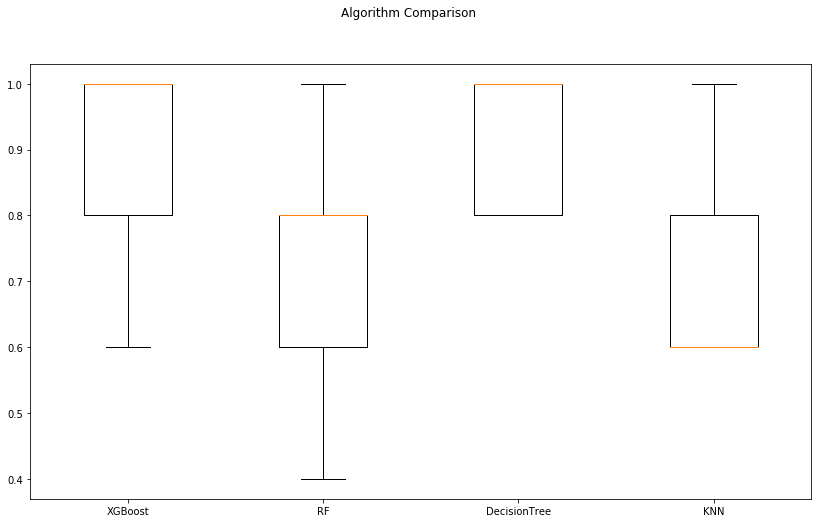

In [35]:
seed = 42
models = []
models.append(('XGBoost', XGBClassifier(seed = seed) ))
# models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=4, random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))

results, names  = [], []
num_folds = 5
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring = scoring, n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

boxplot_algorithm_comparison(results, names)

In [37]:
model = DecisionTreeClassifier(max_depth=4, random_state=seed)
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)

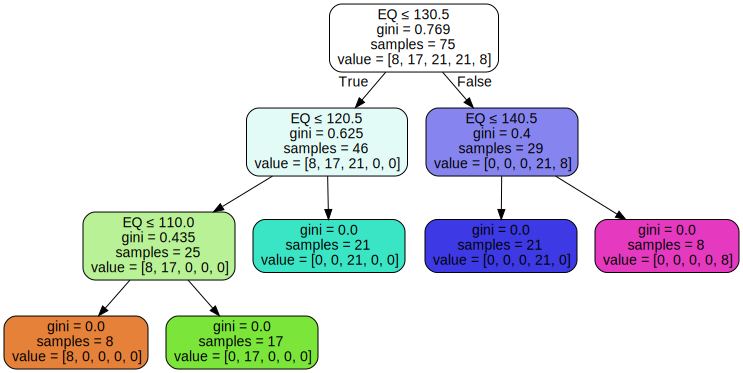

In [38]:
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT")
graph